# Atmosphere Token Analysis

In [1]:
import pandas as pd
pd.options.display.float_format =lambda value : '{:.0f}'.format(value) if round(value,0) == value else '{:,.2f}'.format(value)
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import matplotlib.colors as mcolors

In [2]:
import glob
from pathlib import Path

In [3]:
def clean_album(album):
    album = album.replace(" ", "-")
    album = album.replace(":", "")
    album = album.replace("(", "-")
    album = album.replace(")", "")
    album = album.replace("'", "-")
    album = album.replace(",", "")
    return album

**Lexical Richness** http://www.nltk.org/book/ch01.html#len-set

In [4]:
#this code I used to check my actual one for the specific albums
def lex_rich(album):
    album = clean_album(album)
    filepath = f"../Atmosphere/{album}.txt"
    #this will get us a list of all the words (including repeats)
    file = open(filepath, "r").read().split()
   
    #get the length of file (which has been split into words)
    all_words = len(file)
    
    #get the word count without repeats
    unique_words = len(set(file))
    
    #calculate the Lexical Richness: unique/total
    lexR = (unique_words / all_words) * 100 
    return lexR, album
        

In [5]:
lex_rich("Overcast")

(27.79639380883995, 'Overcast')

In [6]:
def get_unique(artist):
    directory = f"../{artist}"
    filepaths = glob.glob(f"{directory}/*.txt")
    
    lex_list = []
    for file in filepaths:
        album = open(file, "r").read().split()
        total_words = len(album)
        unique_words = len(set(album))
        #calculate the Lexical Richness as percent: unique/total
        lexR = (unique_words / total_words) * 100 
        lex_list.append(lexR)
    return lex_list

In [7]:
def album_names(artist):
    directory = f"../{artist}"
    filepaths = glob.glob(f"{directory}/*.txt")
    #this will be a list of the albums to label our df
    album_titles = [Path(file).stem for file in filepaths]
    return album_titles

In [8]:
get_unique("Atmosphere")

[35.290538484940676,
 33.78129602356407,
 24.513026540053566,
 25.979047143926167,
 27.755725190839698,
 28.659130773728318,
 27.994412757536956,
 24.5933694782686,
 27.79639380883995,
 30.832618025751074,
 24.58957887223412,
 25.629752851711025,
 32.92373707821338,
 32.342941611234295,
 28.396333299000926]

In [9]:
album_names = album_names('Atmosphere')

In [10]:
#Making a list of the album year in the order that the dataframe gave me for the album
#Gonna add this to the dataframe to groupby year (hopefully)
year = [2016, 2019, 1999, 2008, 2018, 2003, 2007, 2002, 1997, 2011, 2016, 2014, 2010, 2005, 2001]

**Making a dataframe for the results of get_unique**

In [11]:
lr_df = pd.DataFrame(get_unique('Atmosphere'))
lr_df = lr_df.rename(columns ={0 : 'lexical richness'})

In [12]:
lr_df.index = album_names
lr_df['album'] = album_names
lr_df['year'] = year

In [13]:
lr_df = lr_df.sort_values(by = 'year')

In [14]:
lr_df

,lexical richness,album,year
Overcast,27.80,Overcast,1997
Headshots-Se7en,24.51,Headshots-Se7en,1999
Lucy-Ford-The-Atmosphere-EP-s,28.40,Lucy-Ford-The-Atmosphere-EP-s,2001
God-Loves-Ugly,24.59,God-Loves-Ugly,2002
Seven-s-Travels,28.66,Seven-s-Travels,2003
You-Can-t-Imagine-How-Much-Fun-We-re-Having,32.34,You-Can-t-Imagine-How-Much-Fun-We-re-Having,2005
Sad-Clown-Bad-Year,27.99,Sad-Clown-Bad-Year,2007
When-Life-Gives-You-Lemons-You-Paint-That-Shit-Gold,25.98,When-Life-Gives-You-Lemons-You-Paint-That-Shit...,2008
To-All-My-Friends-Blood-Makes-the-Blade-Holy-The-Atmosphere-Eps,32.92,To-All-My-Friends-Blood-Makes-the-Blade-Holy-T...,2010
The-Family-Sign,30.83,The-Family-Sign,2011


**Graph Lexical Richness!**

Text(0, 0.5, '% unique words')

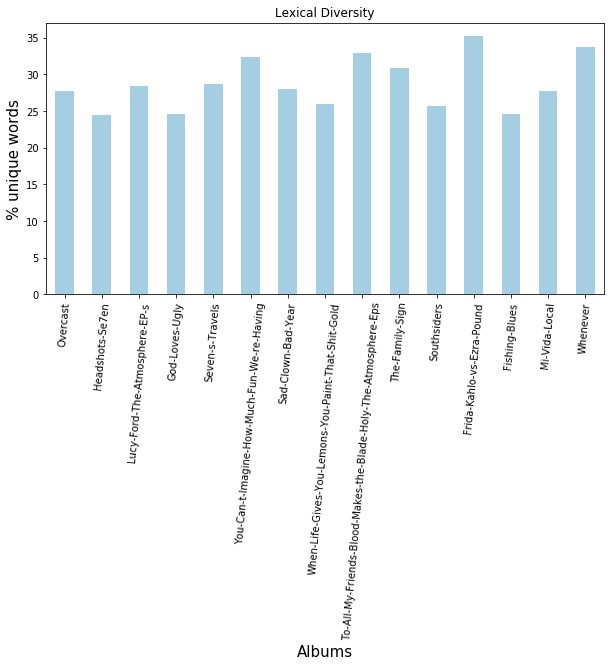

In [17]:
lr_df['lexical richness'].plot(kind='bar', cmap = 'Paired', figsize=(10,5), title='Lexical Diversity')
plt.xticks(rotation=85)
plt.xlabel("Albums", fontsize = 15)
plt.ylabel('% unique words', fontsize = 15)
#plt.savefig('vocab_bar.png', bbox_inches='tight')